<a href="https://colab.research.google.com/github/Presmanes3/OA_Master_AI/blob/main/source/challenges/CH4_Gradient_descent_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$

In [13]:
import math                      # Funciones matematicas
import matplotlib.pyplot as plt  # Generacion de gráficos (otra opcion seaborn)
import numpy as np               # Tratamiento matriz N-dimensionales y otras (fundamental!)

import random

In [14]:
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )

def df(point):
  h = 0.01
  T = np.copy(point)
  grad = np.zeros(2)

  for it, th in enumerate(point):
    T[it] = T[it] + h
    grad[it] = (f(T) - f(point)) / h
  return grad

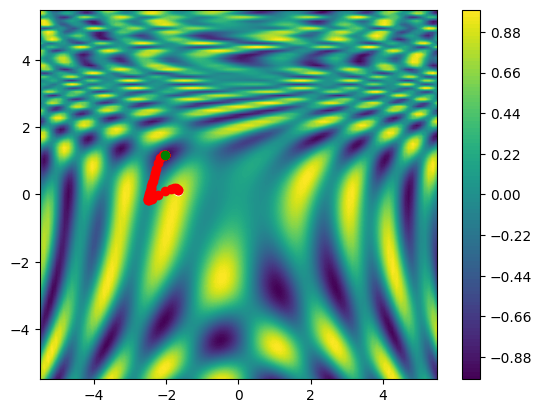

Solucion: [-2.0350773718446984, 1.168073430542985] -0.9998468583625381


In [15]:
# Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango = 5.5

X = np.linspace(-rango,rango,resolucion)
Y = np.linspace(-rango,rango,resolucion)
Z = np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

# Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

# Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

# Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=0.1

# Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

# Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))